<a href="https://colab.research.google.com/github/alessio76/Progetto-ML/blob/main/RandomForestMio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import DistanceMetric
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def grid_search(classifier, training_set, param_grid, n_folds, training_labels):
  grid_search_cv = GridSearchCV(classifier, param_grid, cv=n_folds)
  grid_search_cv.fit(training_set,training_labels)
  print('Combinazione migliore:\n', grid_search_cv.best_params_)
  print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)
  return grid_search_cv.best_params_

In [ ]:
def scoring(classifier, pred_y_test, pred_y_train, test_y, train_y):
  print(metrics.classification_report(pred_y_test, test_y))
  print(metrics.classification_report(pred_y_train, train_y))
  mat = confusion_matrix(test_y, pred_y_test)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

In [ ]:
def predict_values(classifier, test_set, training_set):
  y_test = classifier.predict(test_set)
  y_train = classifier.predict(training_set)
  return y_test, y_train

In [ ]:
dataset = load_breast_cancer()
x,y = dataset["data"], dataset["target"]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.3, random_state=1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(398, 30) (398,) (171, 30) (171,)


In [ ]:
base_classifier = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators' : list(range(101,401,50))}
n_folds = 5
base_values = grid_search(base_classifier, train_x, param_grid, n_folds, train_y)
base_classifier.set_params(**base_values)

Combinazione migliore:
 {'n_estimators': 351}
Accuratezza media della combinazione migliore: 0.947


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=351,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'max_depth': list(range(2,15))}
base_values = {**base_values, **grid_search(base_classifier, train_x, param_grid, n_folds, train_y)}
base_classifier.set_params(**base_values)
print(base_values)

Combinazione migliore:
 {'max_depth': 6}
Accuratezza media della combinazione migliore: 0.947
{'n_estimators': 351, 'max_depth': 6}


              precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.96      0.95      0.96       109

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



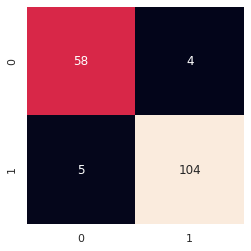

In [ ]:
base_classifier.fit(train_x, train_y)
pred_y_test, pred_y_train = predict_values(base_classifier, test_x, train_x)
scoring(base_classifier, pred_y_test, pred_y_train, test_y, train_y)

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

In [ ]:
scaled_classifier = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators' : list(range(101,401,20))}
scaled_values = grid_search(scaled_classifier, scaled_train_x, param_grid , n_folds, train_y)
scaled_classifier.set_params(**scaled_values)

Combinazione migliore:
 {'n_estimators': 321}
Accuratezza media della combinazione migliore: 0.947


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=321,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'max_depth': list(range(2,15))}
scaled_values = {**scaled_values, **grid_search(scaled_classifier, scaled_train_x, param_grid, n_folds, train_y)}
scaled_classifier.set_params(**scaled_values)
print(scaled_values)

Combinazione migliore:
 {'max_depth': 7}
Accuratezza media della combinazione migliore: 0.947
{'n_estimators': 321, 'max_depth': 7}


              precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.96      0.95      0.96       109

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



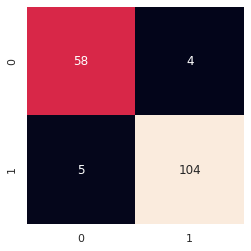

In [ ]:
scaled_classifier.fit(scaled_train_x, train_y)
scaled_pred_y_test, scaled_pred_y_train = predict_values(scaled_classifier, scaled_test_x, scaled_train_x)
scoring(scaled_classifier, scaled_pred_y_test, scaled_pred_y_train, test_y, train_y)

In [ ]:
preservedInfo = .95
pca = PCA(preservedInfo)
pca.fit(scaled_train_x)
reduced_train_x, reduced_test_x = pca.transform(scaled_train_x), pca.transform(scaled_test_x)
print(reduced_train_x.shape, reduced_test_x.shape)

(398, 10) (171, 10)


In [ ]:
reduced_classifier = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators' : list(range(101,401,20))}
reduced_values = grid_search(reduced_classifier, reduced_train_x, param_grid,n_folds,train_y)
reduced_classifier.set_params(**reduced_values)

Combinazione migliore:
 {'n_estimators': 121}
Accuratezza media della combinazione migliore: 0.950


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
param_grid = {'max_depth': list(range(2,15))}
reduced_values = {**reduced_values, **grid_search(reduced_classifier, reduced_train_x, param_grid, n_folds, train_y)}
reduced_classifier.set_params(**reduced_values)
print(reduced_values)

Combinazione migliore:
 {'max_depth': 8}
Accuratezza media della combinazione migliore: 0.950
{'n_estimators': 121, 'max_depth': 8}


              precision    recall  f1-score   support

           0       0.94      0.92      0.93        64
           1       0.95      0.96      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       249

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



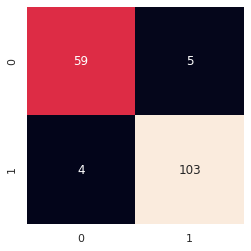

In [ ]:
reduced_classifier.fit(reduced_train_x, train_y)
reduced_pred_y_test, reduced_pred_y_train = predict_values(reduced_classifier, reduced_test_x, reduced_train_x)
scoring(reduced_classifier, reduced_pred_y_test, reduced_pred_y_train, test_y, train_y)